In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df3_m = pd.read_csv('D:/data/ECommerce_FC_data/이커머스 FC주문 데이터_3월.csv')
df4_m = pd.read_csv('D:/data/ECommerce_FC_data/이커머스 FC주문 데이터_4월.csv',encoding='CP949')
df5_m = pd.read_csv('D:/data/ECommerce_FC_data/이커머스 FC주문 데이터_5월.csv',encoding='CP949')
df6_m = pd.read_csv('D:/data/ECommerce_FC_data/이커머스 FC주문 데이터_6월.csv',encoding='UTF8')

C:\Users\ws_45\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ws_45\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


drop columns

REF_ORD_NO : 고객 주문번호, 해당 테이블 key값, 네이버 채번 <br>
BKG_NO : CJ대한통운 주문번호(예약번호)<br>
SHPR_CD : 고객사코드<br>
BRAND_NM : 브랜드 -> 단일상품/조합형옵션상품/추가구성상품/NaN / 단일상품+조합형옵션상품이 데이터 95이상 *재범주화<br>
IF_YN : 수신여부<br>
DLV_DV : 택배구분<br>
ORDER_IDX : 중개업체 주문번호<br>
ORDER_YN : 접수여부<br>
INS_ID : 입력자ID 
    

In [102]:
df3_m = pd.read_csv('D:/data/ECommerce_FC_data/이커머스 FC주문 데이터_3월.csv')

In [3]:
len(df3_m.columns)

32

Delete 9 Columns 

In [4]:
df3_m = df3_m.drop(['REF_ORD_NO','BKG_NO','SHPR_CD','BRAND_NM','IF_YN','DLV_DV','ORDER_IDX','ORDER_YN','INS_ID'],axis=1)

In [5]:
len(df3_m.columns)

23

In [6]:
df3_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309352 entries, 0 to 309351
Data columns (total 23 columns):
CORP_ID               309352 non-null object
BKG_TYP               309352 non-null int64
BKG_DATE              309352 non-null int64
BKG_TIME              309352 non-null int64
INV_AMT               305414 non-null float64
ITEM_SEQ              309352 non-null int64
ITEM_CD               309352 non-null object
ITEM_QTY              309352 non-null int64
ITEM_AMT              306284 non-null float64
ORDER_CRT_DATETIME    301758 non-null float64
REF_ITEM_SEQ          309089 non-null object
DLVPREARRBRANCD       309220 non-null object
DLVPREARREMPNICKNM    299842 non-null object
DLVCLSFCD             309220 non-null object
DLVSUBCLSFCD          309220 non-null object
INS_DATE              309352 non-null int64
INS_TIME              309352 non-null int64
POST_ZONE             309220 non-null float64
SPLIT_EXEC_YN         309352 non-null object
SHPR_ADDR_1           309352 non-null

In [7]:
date = df3_m['BKG_DATE']
qty = df3_m['ITEM_QTY']

date = pd.DataFrame(date)
qty = pd.DataFrame(qty)

In [8]:
date_qty = pd.concat([date,qty],axis=1)
date_qty = date_qty.sort_values(by='BKG_DATE').reset_index(drop=True)
type(date_qty)

pandas.core.frame.DataFrame

In [9]:
groups = date_qty.groupby('BKG_DATE',as_index = False)

In [10]:
gc = groups.count()
gc

,BKG_DATE,ITEM_QTY
0,20210301,8536
1,20210302,11912
2,20210303,13756
3,20210304,10330
4,20210305,12929
5,20210306,5512
6,20210307,6538
7,20210308,7912
8,20210309,7223
9,20210310,7004


In [11]:
# 주문량이 아닌 주문 횟수

gc['ITEM_QTY'].sum()

309352

In [12]:
gc['BKG_DATE']
gc['ITEM_QTY']

0      8536
1     11912
2     13756
3     10330
4     12929
5      5512
6      6538
7      7912
8      7223
9      7004
10     8486
11     6025
12     5943
13     8464
14     8123
15    10051
16     7343
17     6507
18     6529
19     5856
20     8454
21    22070
22    31009
23     9578
24     9379
25    15108
26     7824
27     9278
28    12158
29     9179
30    10336
Name: ITEM_QTY, dtype: int64

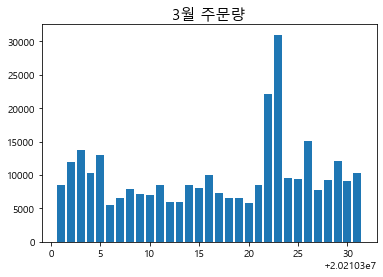

In [13]:
plt.bar(gc['BKG_DATE'], gc['ITEM_QTY'])
plt.title('3월 주문량', fontsize=15)
plt.show()

3월 주문량

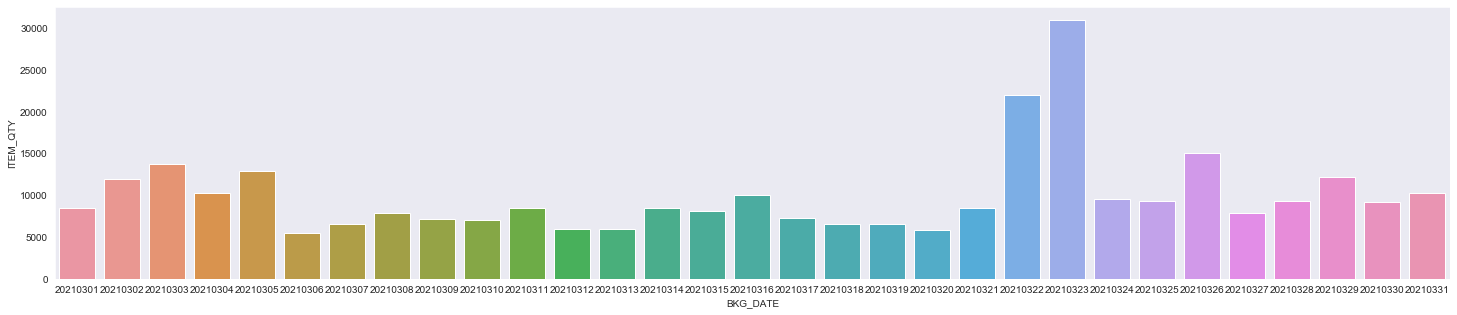

In [14]:
fig = plt.figure(figsize=(25,5))
sns.set_style('dark')

sns.barplot(x=gc['BKG_DATE'],y=gc['ITEM_QTY'])
plt.show()

4월 주문량

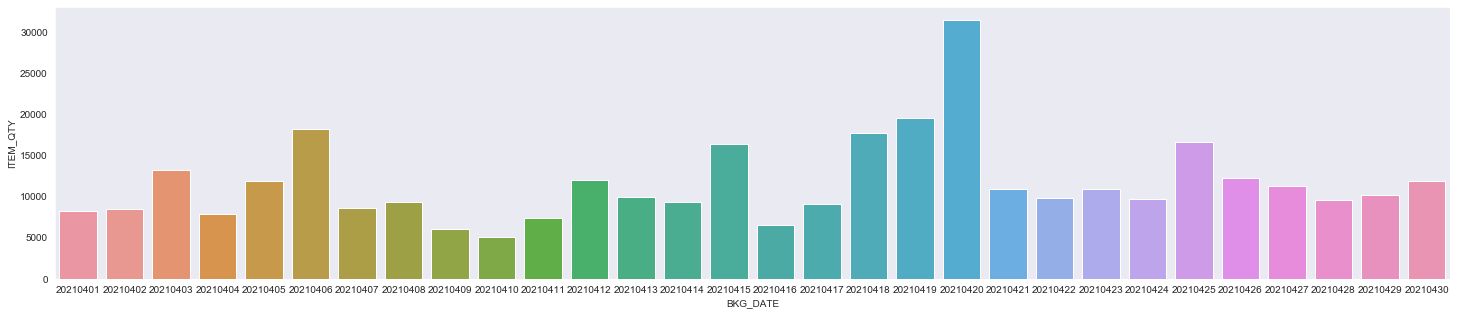

In [15]:
df4_m = df4_m.drop(['REF_ORD_NO','BKG_NO','SHPR_CD','BRAND_NM','IF_YN','DLV_DV','ORDER_IDX','ORDER_YN','INS_ID'],axis=1)

date4 = df4_m['BKG_DATE']
qty4 = df4_m['ITEM_QTY']

date4 = pd.DataFrame(date4)
qty4 = pd.DataFrame(qty4)

date_qty4 = pd.concat([date4,qty4],axis=1)
date_qty4 = date_qty4.sort_values(by='BKG_DATE').reset_index(drop=True)

groups4 = date_qty4.groupby('BKG_DATE',as_index = False)
gc4 = groups4.count()

fig = plt.figure(figsize=(25,5))
sns.set_style('dark')

sns.barplot(x=gc4['BKG_DATE'],y=gc4['ITEM_QTY'])
plt.show()

5월 주문량

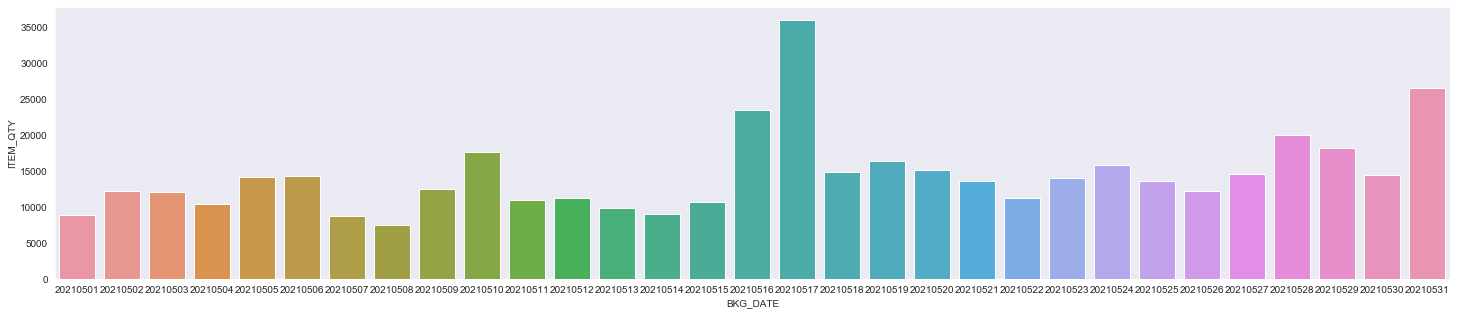

In [16]:
df5_m = df5_m.drop(['REF_ORD_NO','BKG_NO','SHPR_CD','BRAND_NM','IF_YN','DLV_DV','ORDER_IDX','ORDER_YN','INS_ID'],axis=1)

date5 = df5_m['BKG_DATE']
qty5 = df5_m['ITEM_QTY']

date5 = pd.DataFrame(date5)
qty5 = pd.DataFrame(qty5)

date_qty5 = pd.concat([date5,qty5],axis=1)
date_qty5 = date_qty5.sort_values(by='BKG_DATE').reset_index(drop=True)

groups5 = date_qty5.groupby('BKG_DATE',as_index = False)
gc5 = groups5.count()

fig = plt.figure(figsize=(25,5))
sns.set_style('dark')

sns.barplot(x=gc5['BKG_DATE'],y=gc5['ITEM_QTY'])
plt.show()

6월 주문량

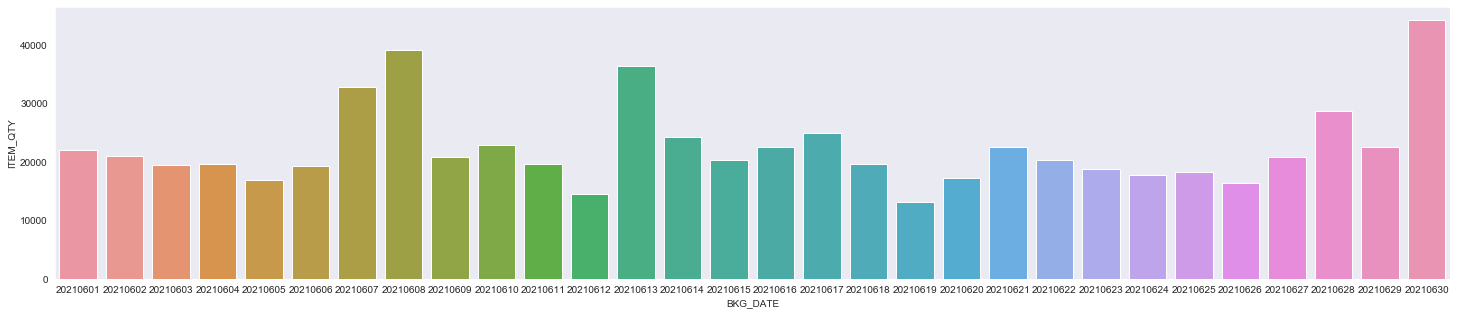

In [17]:
df6_m = df6_m.drop(['REF_ORD_NO','BKG_NO','SHPR_CD','BRAND_NM','IF_YN','DLV_DV','ORDER_IDX','ORDER_YN','INS_ID'],axis=1)

date6 = df6_m['BKG_DATE']
qty6 = df6_m['ITEM_QTY']

date6 = pd.DataFrame(date6)
qty6 = pd.DataFrame(qty6)

date_qty6 = pd.concat([date6,qty6],axis=1)
date_qty6 = date_qty6.sort_values(by='BKG_DATE').reset_index(drop=True)

groups6 = date_qty6.groupby('BKG_DATE',as_index = False)
gc6 = groups6.count()

fig = plt.figure(figsize=(25,5))
sns.set_style('dark')

sns.barplot(x=gc6['BKG_DATE'],y=gc6['ITEM_QTY'])
plt.show()

3 = 22 23(1) / 월화<br>
4 = 20 / 화<br>
5 = 16 17(1) 31 / 일월월<br>
6 = 7 8 13 30(1) / 월화 일 수

BKG_TIME / 시분초 , 0,1 = ?

판매량 예측? 주문량 증가를 예측? => 근거부족